In [1]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

hf_token  = os.getenv('HF_TOKEN')

In [2]:

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(
    "meta-llama/Meta-Llama-3-8B-Instruct",
    token=hf_token,
)

stopping_ids = [
    tokenizer.eos_token_id,
    tokenizer.convert_tokens_to_ids("<|eot_id|>"),
]

/home/onatinak/anaconda3/envs/RAG/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
import torch
from llama_index.llms.huggingface import HuggingFaceLLM

# Optional quantization to 4bit
# from transformers import BitsAndBytesConfig

# quantization_config = BitsAndBytesConfig(
#     load_in_4bit=True,
#     bnb_4bit_compute_dtype=torch.float16,
#     bnb_4bit_quant_type="nf4",
#     bnb_4bit_use_double_quant=True,
# )

# # Local LLM
# llm = HuggingFaceLLM(
#     model_name="meta-llama/Meta-Llama-3-8B-Instruct",
#     model_kwargs={
#         "token": hf_token,
#         "torch_dtype": torch.bfloat16,  # comment this line and uncomment below to use 4bit
#         # "quantization_config": quantization_config
#     },
#     generate_kwargs={
#         "do_sample": True,
#         "temperature": 0.6,
#         "top_p": 0.9,
#     },
#     tokenizer_name="meta-llama/Meta-Llama-3-8B-Instruct",
#     tokenizer_kwargs={"token": hf_token},
#     stopping_ids=stopping_ids,
# )

/home/onatinak/anaconda3/envs/RAG/lib/python3.11/site-packages/pydantic/_internal/_fields.py:161: UserWarning: Field "model_id" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [4]:

## You can deploy the model on HF Inference Endpoint and use it

from llama_index.llms.huggingface import HuggingFaceInferenceAPI

llm = HuggingFaceInferenceAPI(
    model_name="meta-llama/Meta-Llama-3-8B-Instruct",
    token=hf_token
)

/tmp/ipykernel_65863/4255368163.py:5: DeprecationWarning: Call to deprecated class HuggingFaceInferenceAPI. (Deprecated in favor of `HuggingFaceInferenceAPI` from `llama-index-llms-huggingface-api` which should be used instead.)
  llm = HuggingFaceInferenceAPI(


In [9]:
response = llm.complete("How to make a cheesecake?")
print(response)

 A simple recipe for beginners
Cheesecake is a classic dessert that is loved by many. It's creamy, rich, and has a smooth texture that's hard to resist. Making a cheesecake can seem intimidating, but it's actually quite simple. Here's a simple recipe for beginners that yields a delicious and creamy cheesecake.

Ingredients:

For the crust:

* 1 1/2 cups graham cracker crumbs
* 1/4 cup granulated sugar
* 6 tablespoons (3/4 stick) unsalted butter, melted

For the cheesecake:

* 2 pounds cream cheese, softened
* 1/2 cup granulated sugar
* 4 large eggs, separated
* 1 teaspoon vanilla extract
* 1 cup sour cream
* 1 cup heavy cream
* 1/2 cup granulated sugar

Instructions:

1. Preheat your oven to 350°F (180°C).
2. Prepare the crust: In a medium bowl, mix together the graham cracker crumbs, sugar, and melted butter until well combined. Press the mixture into the bottom of a 9-inch springform pan.
3. Prepare the cheesecake: In a large mixing bowl, beat the cream cheese until smooth.


In [6]:
import requests

API_URL = "https://api-inference.huggingface.co/models/meta-llama/Meta-Llama-3-8B"
headers = {"Authorization": "Bearer " + hf_token}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.json()
	
output = query({
	"inputs": "Can you please let us know more details about your ",
})
print(output)

{'error': 'The model meta-llama/Meta-Llama-3-8B is too large to be loaded automatically (16GB > 10GB). Please use Spaces (https://huggingface.co/spaces) or Inference Endpoints (https://huggingface.co/inference-endpoints).'}


Error: 503, {"error":"Model Kwai-Kolors/Kolors is currently loading","estimated_time":639.1670532226562}
No image data.


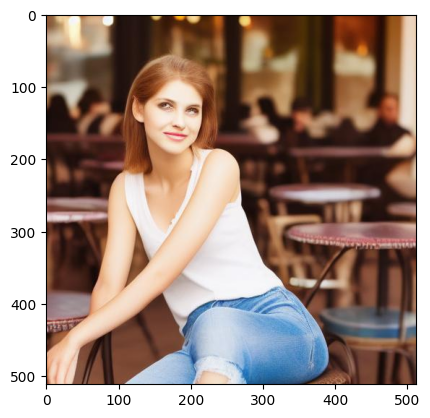